In [1]:
import pandas as pd
from unicodedata import normalize
import numpy as np
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
nf = pd.read_csv('Netflix subscription fee Dec-2021.csv')

In [3]:
nf

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26
1,au,Australia,6114,4050,2064,7.84,12.12,16.39
2,at,Austria,5640,3779,1861,9.03,14.67,20.32
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99
...,...,...,...,...,...,...,...,...
60,ua,Ukraine,5336,3261,2075,5.64,8.46,11.29
61,gb,United Kingdom,6643,4551,2092,7.91,13.20,18.48
62,us,United States,5818,3826,1992,8.99,13.99,17.99
63,uy,Uruguay,4989,3154,1835,8.99,12.99,15.99


# **Задание 1 - составить таблицу среднего дохода в зависимости от страны**

In [4]:
sr = pd.read_html('https://www.numbeo.com/cost-of-living/prices_by_country.jsp?displayCurrency=USD&itemId=105')

In [5]:
df = sr[1]

In [6]:
df

,Rank,Country,Average Monthly Net Salary (After Tax)
0,NaN,Kazakhstan,387.24
1,NaN,Portugal,985.12
2,NaN,Syria,67.03
3,NaN,Greece,848.17
4,NaN,Latvia,967.65
...,...,...,...
102,NaN,Denmark,3576.87
103,NaN,Dominican Republic,334.89
104,NaN,Mexico,559.53
105,NaN,Montenegro,554.07


In [7]:
result_table = pd.merge(nf,df, how = 'left', on = 'Country')
result_table.pop('Rank')
result_table

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),Average Monthly Net Salary (After Tax)
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26,398.14
1,au,Australia,6114,4050,2064,7.84,12.12,16.39,3614.46
2,at,Austria,5640,3779,1861,9.03,14.67,20.32,2328.67
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32,2410.82
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99,497.94
...,...,...,...,...,...,...,...,...,...
60,ua,Ukraine,5336,3261,2075,5.64,8.46,11.29,480.21
61,gb,United Kingdom,6643,4551,2092,7.91,13.20,18.48,2746.17
62,us,United States,5818,3826,1992,8.99,13.99,17.99,3605.68
63,uy,Uruguay,4989,3154,1835,8.99,12.99,15.99,622.63


# **Задание 2 - график корреляции между средним доходом и ценой подписки**

<AxesSubplot:xlabel='Average Monthly Net Salary (After Tax)', ylabel='Cost Per Month - Basic ($)'>

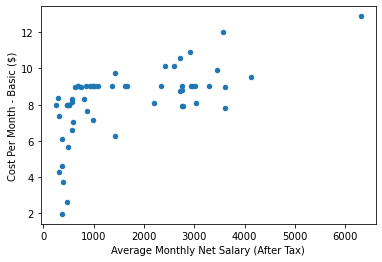

In [8]:
result_table.plot.scatter(x='Average Monthly Net Salary (After Tax)', y='Cost Per Month - Basic ($)')

# **Какая средняя цена подписки в зависимости от валюты страны**

*Подгружаю таблицу с валютами стран*

In [9]:
kagl = pd.read_csv('Netflix Value for Money - Update Dec 2021 - Netflix Price.csv')

In [10]:
kagl.pop('Mobile')
kagl.pop('Basic')
kagl.pop('Standard')
kagl.pop('Premium')
kagl.columns = ['Country', 'Currency']
kagl

,Country,Currency
0,Argentina,ARS
1,Australia,AUS
2,Austria,EUR
3,Belgium,EUR
4,Bolivia,USD
...,...,...
60,Ukraine,EUR
61,United Kingdom,GBP
62,United States,USD
63,Uruguay,USD


In [11]:
df_with_curr=pd.merge(nf,kagl,on='Country',how='left')

In [12]:
df_with_curr

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),Currency
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26,ARS
1,au,Australia,6114,4050,2064,7.84,12.12,16.39,AUS
2,at,Austria,5640,3779,1861,9.03,14.67,20.32,EUR
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32,EUR
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99,USD
...,...,...,...,...,...,...,...,...,...
60,ua,Ukraine,5336,3261,2075,5.64,8.46,11.29,EUR
61,gb,United Kingdom,6643,4551,2092,7.91,13.20,18.48,GBP
62,us,United States,5818,3826,1992,8.99,13.99,17.99,USD
63,uy,Uruguay,4989,3154,1835,8.99,12.99,15.99,USD


In [13]:
stats = df_with_curr.groupby('Currency').mean()

In [14]:
stats[['Cost Per Month - Basic ($)','Cost Per Month - Standard ($)','Cost Per Month - Premium ($)']]

,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
Currency,,,
ARS,3.740000,6.300000,9.260000
AUS,7.840000,12.120000,16.390000
BRL,4.610000,7.110000,9.960000
CAD,7.910000,11.870000,15.030000
CHF,12.880000,20.460000,26.960000
CLP,7.070000,9.910000,12.740000
COP,4.310000,6.860000,9.930000
DKK,12.000000,15.040000,19.600000
EUR,8.982917,13.050000,17.118750


# **Какая средняя цена подписки в зависимости от континента**

*Подгружаю таблицу с континентами*

In [15]:
np_region = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(PPP)')

In [16]:
region = np_region[2]

In [17]:
region.pop('IMF[1]')
region.pop('World Bank[5]')
region.pop('CIA[6]')

,Estimate,Year
0,23009780,2020
1,19846720,2020
2,19885625,2019
3,8443360,2020
4,7826781,2020
...,...,...
224,167,2011[obsolete source]
225,145,2019
226,60,2004 [obsolete source]
227,49,2019


In [18]:
region.columns = ['Country','Subregion','Region']

In [19]:
nf_with_regions = pd.merge(nf,region,how='left', on='Country')

In [20]:
nf_with_regions

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),Subregion,Region
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26,South America,Americas
1,au,Australia,6114,4050,2064,7.84,12.12,16.39,"Australia, New Zealand",Oceania
2,at,Austria,5640,3779,1861,9.03,14.67,20.32,Western Europe,Europe
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32,Western Europe,Europe
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99,South America,Americas
...,...,...,...,...,...,...,...,...,...,...
60,ua,Ukraine,5336,3261,2075,5.64,8.46,11.29,Eastern Europe,Europe
61,gb,United Kingdom,6643,4551,2092,7.91,13.20,18.48,Northern Europe,Europe
62,us,United States,5818,3826,1992,8.99,13.99,17.99,Northern America,Americas
63,uy,Uruguay,4989,3154,1835,8.99,12.99,15.99,South America,Americas


In [21]:
nf_with_regions.groupby('Region').mean()[['Cost Per Month - Basic ($)','Cost Per Month - Standard ($)','Cost Per Month - Premium ($)']]

,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
Region,,,
Africa,6.260000,10.050000,12.580000
Americas,7.223750,10.465625,13.548750
Asia,7.636667,10.404167,12.966667
Europe,9.242424,13.359394,17.648485
Oceania,8.320000,12.325000,16.665000


# **Сколько стоит подписка относительно среднего дохода (базовая, стандартная, премиум) в Чехии?**
В том датасете что я нашел по средним зарплатам по странам, к сожалению не было чехии, поэтому там Nan

In [22]:
result_table[result_table['Country'] == 'Czechia']

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),Average Monthly Net Salary (After Tax)
12,cz,Czechia,7325,5234,2091,8.83,11.49,14.15,NaN


# **Какие топ-5 стран имеют самую большую доступную коллекцию сериалов?**

In [23]:
nf.sort_values('Total Library Size',ascending = False).head(5)

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
12,cz,Czechia,7325,5234,2091,8.83,11.49,14.15
51,sk,Slovakia,7035,5055,1980,9.03,11.29,13.54
24,hu,Hungary,6884,4802,2082,7.64,10.71,13.78
6,bg,Bulgaria,6797,4819,1978,9.03,11.29,13.54
61,gb,United Kingdom,6643,4551,2092,7.91,13.20,18.48


# **Какой процент среднего дохода россиянина будет составлять подписка Netflix?**

In [24]:
float(result_table[result_table['Country'] == 'Russia']['Cost Per Month - Basic ($)'] * 100 / result_table[result_table['Country'] == 'Russia']['Average Monthly Net Salary (After Tax)'])

1.4299533902031487

*Ответ: 1.43%*

# **На каком месте будет Россия, если отсортировать страны по эффективности подписки (Cost Per Title)**

*Подгрузим датасет со значениями cost per title*

In [25]:
cost_per_title = pd.read_csv('Netflix Value for Money - Update Dec 2021 - Basic.csv')

In [26]:
cost_per_title = cost_per_title[['Country','Price per Title']]

In [27]:
cost_per_title = cost_per_title.sort_values('Price per Title').reset_index(drop=True)

In [28]:
cost_per_title[cost_per_title['Country'] == 'Russia']

,Country,Price per Title
26,Russia,0.00142


*26 место займет Россия*

# **В какой стране лучше всего брать VPN для того, чтобы платить за Netflix меньше всего?**

In [29]:
cost_per_title.head(1)

,Country,Price per Title
0,Turkey,0.00043


*Ответ: В Турции*